# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [2]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-17 00:00:00-04:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000,0.0,0.0
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,0.0,0.0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,0.0,0.0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,0.0,0.0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,0.0,0.0


In [3]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [4]:
dfo.options  #to get the date of different expiration time

('2024-06-25',
 '2024-06-26',
 '2024-06-27',
 '2024-06-28',
 '2024-07-01',
 '2024-07-02',
 '2024-07-03',
 '2024-07-05',
 '2024-07-08',
 '2024-07-09',
 '2024-07-10',
 '2024-07-11',
 '2024-07-12',
 '2024-07-15',
 '2024-07-16',
 '2024-07-17',
 '2024-07-18',
 '2024-07-19',
 '2024-07-22',
 '2024-07-23',
 '2024-07-24',
 '2024-07-25',
 '2024-07-26',
 '2024-07-29',
 '2024-07-30',
 '2024-07-31',
 '2024-08-01',
 '2024-08-02',
 '2024-08-09',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-10-31',
 '2024-11-15',
 '2024-11-29',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-07-18',
 '2025-09-19',
 '2025-12-19',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [5]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [6]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240626C04000000,2024-06-13 14:37:10+00:00,4000.0,1419.58,1449.2,1466.4,0.0,0.0,1.0,0,2.261967,True,REGULAR,USD
1,SPXW240626C04100000,2024-06-24 13:43:54+00:00,4100.0,1362.48,1349.2,1366.4,0.0,0.0,1.0,0,2.107305,True,REGULAR,USD
2,SPXW240626C04400000,2024-06-20 14:37:34+00:00,4400.0,1099.43,1049.3,1066.7,0.0,0.0,NaN,0,1.664064,True,REGULAR,USD
3,SPXW240626C04450000,2024-06-20 14:37:57+00:00,4450.0,1048.58,999.3,1016.5,0.0,0.0,NaN,0,1.587710,True,REGULAR,USD
4,SPXW240626C04500000,2024-06-20 14:39:12+00:00,4500.0,999.23,953.9,962.1,0.0,0.0,NaN,0,1.517764,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [7]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_return = log_return[1:]  #to remove nan
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)

    return vol

In [8]:
vol = annual_vol(df)
vol

0.15882462010951306

# **BLACK-SCHOLES MODEL**


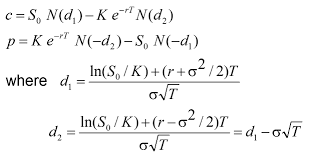

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [9]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """


    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    return premium

In [10]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [11]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
4000.0,1447.870354
4100.0,1347.870359
4400.0,1047.870377
4450.0,997.870380
4500.0,947.870383


In [12]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
4000.0,1419.58
4100.0,1362.48
4400.0,1099.43
4450.0,1048.58
4500.0,999.23


In [13]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
4000.0,1447.870354,1419.58
4100.0,1347.870359,1362.48
4400.0,1047.870377,1099.43
4450.0,997.870380,1048.58
4500.0,947.870383,999.23
4550.0,897.870386,814.54
4650.0,797.870392,674.87
4700.0,747.870395,625.41
4800.0,647.870402,524.10
4825.0,622.870405,637.31


<Axes: >

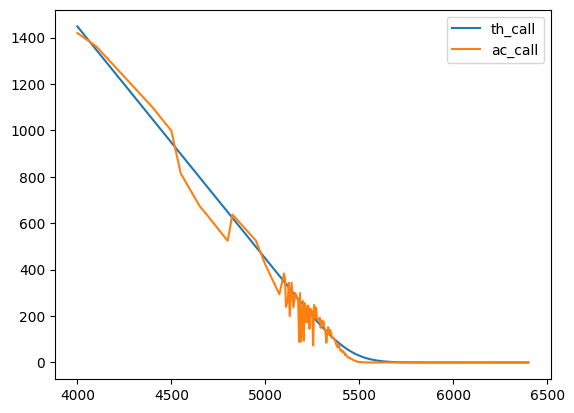

In [14]:
call.plot() #plotting the actual and theoretical call prices

In [15]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2400.0,3.261039e-266
2600.0,4.415981e-217
2800.0,4.529862e-176
3000.0,9.298194e-142
3400.0,5.048207e-89


In [16]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2400.0,0.10
2600.0,0.10
2800.0,0.05
3000.0,0.17
3400.0,0.05


In [17]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5545.0,114.034457,70.93
5550.0,117.949566,88.91
5555.0,121.920096,88.69
5570.0,134.146498,107.80
5575.0,138.320929,111.10
5580.0,142.541839,116.35
5585.0,146.807431,116.70
5590.0,151.115914,121.75
5595.0,155.465512,113.08
5620.0,177.769562,152.70


<Axes: >

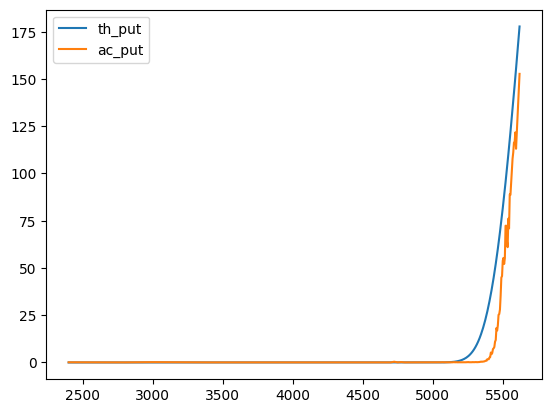

In [18]:
put.plot()